# Twitter Data Analysis for keyword - 'TicketMaster'

The analysis is divided into the following sub-sections
1. Importing all the necessary libraries.
2. Reading the provided data into data frame. We used Pandas library for the same. 
3. Preliminary Analysis.
4. Word Cloud. 
5. Sentiment Analysis

### Step 1: Downloading all the necessary libraries and packages

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


### Step 2: Importing all necessary packages

In [4]:
#libraray for calculating frequency
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud

#libaray for regular expression
import re

### Step 3: Reading CSV File as a DataFrame using Pandas
Our Dataframe represents top 5000 tweets for the key word 'ticketmaster'. The function describe provides an overview of various columns present in the data.

In [5]:
ticket_master_df = pd.read_csv('tweets_ticketmaster_5000.csv', index_col=0)

#shows all the columns 
print(ticket_master_df.columns)

#understand data type of all columns
print(ticket_master_df.dtypes)

Index(['tweet_text', 'user_screen_name', 'user_name', 'user_location',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_favourites_count', 'tweet_created_at', 'tweet_id', 'tweet_source',
       'tweet_lang', 'tweet_quote_count', 'tweet_reply_count',
       'tweet_retweet_count', 'tweet_favorite_count', 'source_tweet_text',
       'is_retweet', 'source_user_screen_name', 'source_user_name',
       'source_user_location', 'source_user_followers_count',
       'source_user_friends_count', 'source_user_listed_count',
       'source_user_favourites_count', 'source_tweet_created_at',
       'source_tweet_id', 'source_tweet_source', 'source_tweet_lang',
       'source_tweet_quote_count', 'source_tweet_reply_count',
       'source_tweet_retweet_count', 'source_tweet_favorite_count'],
      dtype='object')
tweet_text                       object
user_screen_name                 object
user_name                        object
user_location                    

### Step 4: Collecting tweets from column tweet_text as a list
As a part of this step we collect each tweet into a list and then use split function to append all tweet words in the tweet_word array

In [6]:
# list to hold all the twitter textual data 
tweet_list = list(ticket_master_df['tweet_text'])

#array to hold all the words in the twitter data 
tweet_words = []
for tweet in tweet_list:
    tweet_words.extend(tweet.lower().split())

# Priliminary Analysis

## 1. Ten most popular tweet words with and without stop words

In [7]:
# function that returns 'n' common words from a list
def polularWordGenerator(list,n):
    word_counter = Counter(list)
    return word_counter.most_common(n)

In [8]:
#most popular key words with stop words
polularWordGenerator(tweet_words,10)

[('the', 3420),
 ('rt', 3333),
 ('ticketmaster', 2586),
 ('to', 2291),
 ('a', 1353),
 ('is', 1326),
 ('and', 1311),
 ('of', 1226),
 ('for', 1203),
 ('taylor', 1121)]

In [9]:
# most common words after removing stop words. We use the stop word list provided by the NLTK library
stopwords = nltk.corpus.stopwords.words('english')
non_stop_tweet_words = [] # final list of words after removing stop words

for w in tweet_words:
    if w not in stopwords and len(w) > 1:      #filtering words that are not in stopwords array and length greater than 1
        non_stop_tweet_words.append(w)

In [10]:
#using polularWordGenerator function to find top 10 words without stop words
polularWordGenerator(non_stop_tweet_words,10)

[('rt', 3333),
 ('ticketmaster', 2586),
 ('taylor', 1121),
 ('@ticketmaster', 1041),
 ('tickets', 943),
 ('swift', 669),
 ('tour', 395),
 ('like', 388),
 ('get', 361),
 ('fans', 349)]

##### To have a better understanding of some relevant keywords, we further removed words such as 'rt' because these words represent re_tweet and likes associated with the tweet and does not provide any real information

In [11]:
filter_words = ['rt']
non_stop_filtered_words = []
for w in non_stop_tweet_words:
    if w not in filter_words and len(w) > 1:     #filtering words that are not in filter_words array and length greater than 1
        non_stop_filtered_words.append(w)

In [12]:
polularWordGenerator(non_stop_filtered_words,10)

[('ticketmaster', 2586),
 ('taylor', 1121),
 ('@ticketmaster', 1041),
 ('tickets', 943),
 ('swift', 669),
 ('tour', 395),
 ('like', 388),
 ('get', 361),
 ('fans', 349),
 ('sale', 303)]

### 2. Ten most popluar hashtags 

In [13]:
hashtags=[]    # array to hold all hashtags

for w in non_stop_tweet_words:
    if w.startswith('#') and len(w) > 1:   #select words that start with #
        hashtags.append(w)
        
# using polularWordGenerator function to find top 10 most popular hashtags       
polularWordGenerator(hashtags,10)

[('#ticketmaster', 84),
 ('#ticketmasterisoverparty', 62),
 ('#tstheerastour', 34),
 ('#taylorswift', 33),
 ('#theerastour', 28),
 ('#taylorswifttheerastour', 24),
 ('#swifties', 23),
 ('#tserastour', 21),
 ('#taylorswifterastour', 19),
 ('#cryptotwitter', 16)]

### 3. Ten most frequently mentioned user names

In [14]:
usernames=[]   # array to hold all usernames 

for w in non_stop_tweet_words:
    if w.startswith('@') and len(w) > 1:    #select words that start with @
        usernames.append(w)
        
# using polularWordGenerator function to find top 10 most frequently mentioned usernames

polularWordGenerator(usernames,10)

[('@ticketmaster', 1041),
 ('@taylorswift13', 196),
 ('@moreperfectus:', 166),
 ('@taybeautifulll:', 113),
 ('@aoc:', 96),
 ('@alexandergold:', 86),
 ('@cursedhive:', 86),
 ('@moreperfectus', 80),
 ('@popbase:', 74),
 ('@jillboard:', 68)]

 ### 4. Most Vocal User

In [15]:
#getting all user_screen_names 
user_screen_name = list(ticket_master_df['user_screen_name'])

#generating the top screen name with maximum number of tweets
polularWordGenerator(user_screen_name,1)

[('tinyyoongi', 15)]

### Step 4: Defining the most influential user

In [16]:
# creating additional column to find the value of most_influential_user
ticket_master_df['most_influential_user'] = ticket_master_df['source_user_followers_count'] + ticket_master_df['source_user_friends_count'] + ticket_master_df['source_user_listed_count'] + ticket_master_df['source_user_favourites_count']

### 5. Most influential user

In [17]:
#sorting values in descending order and getting the top result
ticket_master_df.sort_values('most_influential_user', ascending=False).head(1)

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,...,source_user_favourites_count,source_tweet_created_at,source_tweet_id,source_tweet_source,source_tweet_lang,source_tweet_quote_count,source_tweet_reply_count,source_tweet_retweet_count,source_tweet_favorite_count,most_influential_user
3346,RT @taylorswift13: UM. Looks like Ill get to s...,ardel_adel,adel ardel,NaN,103,31,0,2,Fri Nov 18 00:43:04 +0000 2022,1593404386411257862,...,1490.0,Fri Nov 04 13:00:22 +0000 2022,1.588517e+18,"<a href=""http://twitter.com/download/iphone"" r...",en,14769.0,11992.0,30039.0,316020.0,91964815.0


### 6. Most influential re_tweet

In [18]:
# creating additional column to find the value of most_influential_retweet

ticket_master_df['most_influential_retweet'] = ticket_master_df['source_tweet_quote_count'] + ticket_master_df['source_tweet_reply_count'] + ticket_master_df['source_tweet_retweet_count'] + ticket_master_df['source_tweet_favorite_count']

In [19]:
#filtering columns that only has is_retweet as True

ticket_master_df[ticket_master_df['is_retweet']==True].sort_values('most_influential_retweet', ascending=False).head(1)

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,...,source_tweet_created_at,source_tweet_id,source_tweet_source,source_tweet_lang,source_tweet_quote_count,source_tweet_reply_count,source_tweet_retweet_count,source_tweet_favorite_count,most_influential_user,most_influential_retweet
4436,RT @AOC: Daily reminder that Ticketmaster is a...,Tak3itezy,Mother of Dragons,NaN,90,151,0,8124,Fri Nov 18 00:46:45 +0000 2022,1593405312135929858,...,Tue Nov 15 18:35:58 +0000 2022,1.592587e+18,"<a href=""http://twitter.com/download/iphone"" r...",en,9250.0,19190.0,41504.0,354080.0,13570367.0,424024.0


## Word Cloud

### Step 1: Convert tweet list as a string of words
As a part of this step, we also remove words like 'http', 'https' and 't co' to have a better analysis

In [20]:
tweet_long_string = ''
for t in tweet_list:
    result = re.sub(r"http\S+", "",t)     #regular expression sub function to replace words like https by empty string by matching literal charcters
    tweet_long_string = tweet_long_string + result

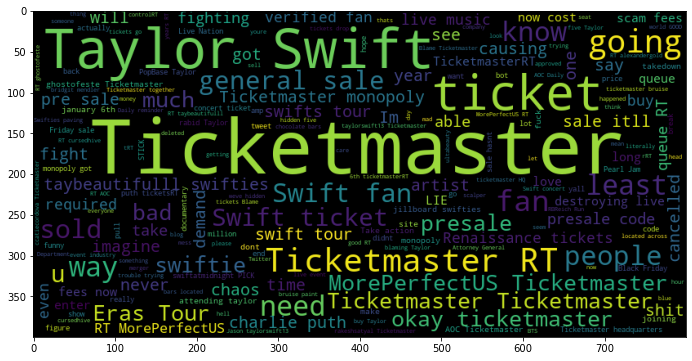

In [21]:
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(tweet_long_string) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(12,6)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

## Sentiment Analysis 

### Step 1: Calculate total polarity of all tweets

In [22]:
# function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
#Column to define tweet_polarity
ticket_master_df['tweet_subjectivity'] = ticket_master_df['tweet_text'].apply(getSubjectivity)

#column to define tweet_subjectivity
ticket_master_df['tweet_polarity'] = ticket_master_df['tweet_text'].apply(getPolarity)

### 1. Average Polarity and Subjectivity

In [24]:
avg_subjectivity = (ticket_master_df['tweet_subjectivity'].sum())/len(ticket_master_df.index)
print(avg_subjectivity)

0.32227348889155377


In [25]:
avg_polarity = (ticket_master_df['tweet_polarity'].sum())/len(ticket_master_df.index)
print(avg_polarity)

0.022010946559340078


### Step 2: Define a dataframe for subjectivity and Polarity
We also describe the dataframe in order to understand the range of subjectivity and Polarity

In [26]:
#dataframe for subjectivity score and tweet_text
ticket_master_subjectivity_df = ticket_master_df[['tweet_text','tweet_subjectivity']]

ticket_master_subjectivity_df.describe()

,tweet_subjectivity
count,5000.000000
mean,0.322273
std,0.314806
min,0.000000
25%,0.000000
50%,0.250000
75%,0.550893
max,1.000000


In [27]:
#dataframe for polarity score and tweet_text
ticket_master_polarity_df = ticket_master_df[['tweet_text','tweet_polarity']]

ticket_master_polarity_df.describe()

,tweet_polarity
count,5000.000000
mean,0.022011
std,0.264703
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.125000
max,1.000000


### 2: Plot the Histogram

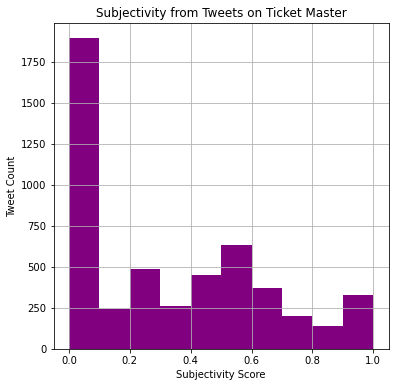

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histogram of the polarity values
ticket_master_subjectivity_df.hist(ax=ax,color="purple")

plt.title("Subjectivity from Tweets on Ticket Master")
plt.xlabel("Subjectivity Score")
plt.ylabel("Tweet Count")
plt.show()

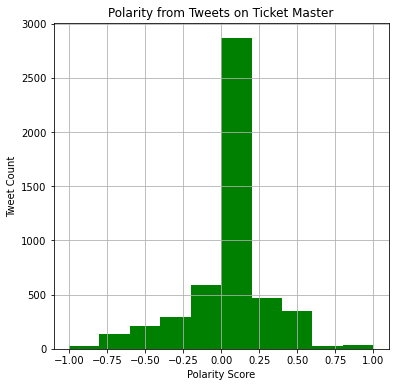

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histogram of the polarity values
ticket_master_polarity_df.hist(ax=ax,color="green")

plt.title("Polarity from Tweets on Ticket Master")
plt.xlabel("Polarity Score")
plt.ylabel("Tweet Count")
plt.show()

### 3. Positive and Negative Polarity 

In [30]:
#Top 3 positive polarity tweets

ticket_master_polarity_df.sort_values('tweet_polarity', ascending = False).head(3)

,tweet_text,tweet_polarity
444,@nikluvn @thisisabbytryin @Ticketmaster Capita...,1.0
3605,Ive gotten tickets since Speak Now with no iss...,1.0
2386,"Despite this *scandalous* development, we'll b...",1.0


In [31]:
#Bottom 3 polarity tweets 

ticket_master_polarity_df.sort_values('tweet_polarity', ascending = False).tail(3)

,tweet_text,tweet_polarity
4883,RT @willie_lutz: Twitter and Ticketmaster are ...,-1.0
3767,its actually insane im just gonna wait for the...,-1.0
2986,these numbers are insane,-1.0
